## Import MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
import pandas as pd
import numpy as np

In [5]:
x = mnist.data.to_numpy()

In [6]:
x.shape

(70000, 784)

In [7]:
y = mnist.target.to_numpy()

In [8]:
y.shape

(70000,)

### Plot

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
some_digit = x[3600]

In [12]:
some_digit_image = some_digit.reshape(28,28)

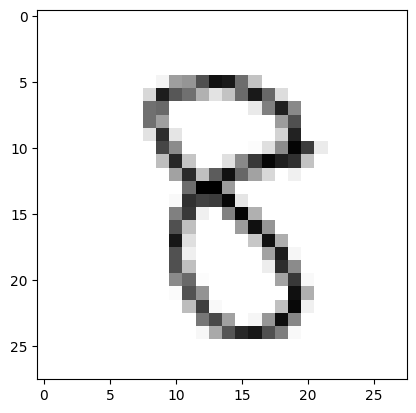

In [13]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
#plt.axis('off')  # To hide the axis

In [14]:
y[3600]

'8'

## Dividing the dataset into training data and test data

In [15]:
x_train, x_test = x[:55000], x[55000:]

In [16]:
y_train, y_test = y[:55000], y[55000:]

#### Shuffling the training dataset

In [17]:
shuffle_index = np.random.permutation(55000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating an '8' detector 

In [18]:
# Whether the digit is 8 or not. If the y value is 8, it will return True or else False
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [19]:
y_train_8

array([False,  True, False, ..., False, False,  True])

In [20]:
y_test_8

array([False, False,  True, ..., False, False, False])

## Model Selection

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1)
model.fit(x_train, y_train_8)

LogisticRegression(tol=0.1)

In [22]:
model.predict([some_digit])

array([ True])

### Evaluating the model

#### Cross - Validation

In [23]:
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(model, x_train, y_train_8, cv = 10, scoring = 'accuracy')

In [24]:
lr_score

array([0.94309091, 0.95490909, 0.94672727, 0.944     , 0.946     ,
       0.94709091, 0.95090909, 0.93854545, 0.94854545, 0.94618182])

In [25]:
lr_score.mean()

0.9466000000000001

ACCURACY IS NOT A GOOD METRIC TO EVALUATE CLASSIFIERS

Accuracy is not always the best way to evaluate classifiers (especially in skewed datasets).
Evaluating a classifier is trickier than evaluating a regressor.

So, we use other metrics like confusion matrix, precision, recall and F1 score to evaluate the model.

In [26]:
# Prediction

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, x_train, y_train_8, cv=10)

In [28]:
y_train_pred

array([False,  True, False, ..., False, False, False])

#### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_train_8, y_train_pred)

In [31]:
cm

array([[48523,  1120],
       [ 1817,  3540]], dtype=int64)

#### Precision and Recall 

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
ps = precision_score(y_train_8, y_train_pred)

In [34]:
ps

0.759656652360515

In [35]:
rs = recall_score(y_train_8, y_train_pred)

In [36]:
rs

0.6608176218032481

#### F1 score

In [37]:
from sklearn.metrics import f1_score
fs = f1_score(y_train_8, y_train_pred)
fs

0.7067984426474992

#### Precision-Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
y_scores =  cross_val_predict(model, x_train, y_train_8, cv=10, method = 'decision_function')

In [40]:
y_scores

array([-18.89094959,   5.29496515,  -3.53595973, ...,  -5.6620372 ,
        -5.36762515,  -2.11818286])

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

In [42]:
precisions

array([0.0974    , 0.09740177, 0.09740354, ..., 0.5       , 1.        ,
       1.        ])

In [43]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.86671645e-04, 1.86671645e-04, 0.00000000e+00])

In [44]:
thresholds

array([-27.17760953, -27.03529773, -26.66912657, ...,   7.91029204,
         8.01939437,   8.17327743])

##### Plotting the curve

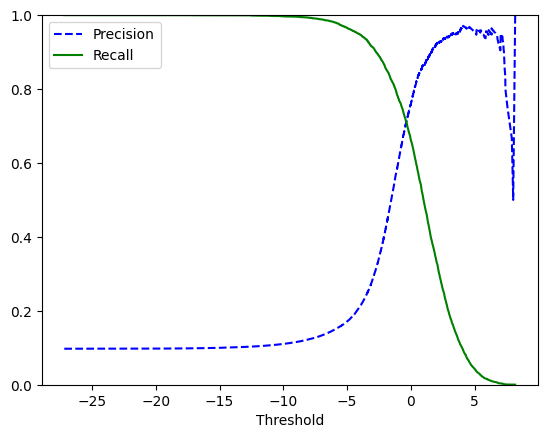

In [45]:
plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision')
plt.plot(thresholds, recalls[:-1], "g-", label = 'Recall')
plt.xlabel("Threshold")
plt.legend(loc = 'upper left')
plt.ylim([0,1])
plt.show()